In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from datetime import datetime

First step is to load our datasets. 

In [3]:
# Step 1: Load datasets

# Load Wine dataset
wine_df = pd.read_csv("wine_data.csv")

# Load Chickwts dataset
chickwts_df = pd.read_csv("chickwts_data.csv")

# Load USArrests dataset
arrests_df = pd.read_csv("arrests_data.csv")

# Quick look at the first few rows of each dataset
print("Wine Dataset:")
display(wine_df.head())

print("\nChickwts Dataset:")
display(chickwts_df.head())

print("\nUSArrests Dataset:")
display(arrests_df.head())

print("Wine Dataset shape:", wine_df.shape)
print("Chickwts Dataset shape:", chickwts_df.shape)
print("USArrests Dataset shape:", arrests_df.shape)


Wine Dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0



Chickwts Dataset:


,feed_name,proteinContent,fatContent,fiberContent,calciumContent,phosphorusContent,moistureContent,ashContent,metabolizableEnergy,lysineContent,methionineContent,particleSize,density,price,shelfLife,weight
0,FirstPeck,19.5,3.2,2.4,0.82,0.78,10.8,4.5,2921,0.96,0.43,3.5,0.57,1.71,295,16.285714
1,ChickStart Plus,18.2,3.8,3.9,3.02,0.68,9.3,6.9,2865,0.99,0.37,3.4,0.70,1.67,302,20.588235
2,EarlyGrow Formula,19.3,4.6,3.2,1.20,0.69,10.2,5.8,2950,1.05,0.38,3.3,0.69,1.65,331,20.909091
3,HatchMate Premier,20.2,3.7,3.8,3.16,0.63,11.4,5.7,2866,1.11,0.38,3.2,0.74,1.71,292,23.125000
4,PeepNourish,19.2,3.9,4.2,3.06,0.61,9.3,5.9,2860,0.91,0.34,2.9,0.64,1.67,309,22.068966



USArrests Dataset:


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Wine Dataset shape: (178, 14)
Chickwts Dataset shape: (100, 16)
USArrests Dataset shape: (50, 5)


After printing the first few rows of each individual dataset, we can get an idea of the different categories that are being used. I also printed out the shape of each dataset so that we can see just how large each dataset is. From this we can see that we are working with pretty reasonable number. Next we can check for any missing values and handle inconsistencies. 

In [4]:
#Inspect for missing values and inconsistencies

# Check for missing values
print("Missing values in Wine dataset:")
print(wine_df.isnull().sum(), "\n")

print("Missing values in Chickwts dataset:")
print(chickwts_df.isnull().sum(), "\n")

print("Missing values in USArrests dataset:")
print(arrests_df.isnull().sum(), "\n")

# Check for duplicate rows (potential inconsistencies)
print("Duplicate rows in Wine dataset:", wine_df.duplicated().sum())
print("Duplicate rows in Chickwts dataset:", chickwts_df.duplicated().sum())
print("Duplicate rows in USArrests dataset:", arrests_df.duplicated().sum())

Missing values in Wine dataset:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64 

Missing values in Chickwts dataset:
feed_name              0
proteinContent         0
fatContent             0
fiberContent           0
calciumContent         0
phosphorusContent      0
moistureContent        0
ashContent             0
metabolizableEnergy    0
lysineContent          0
methionineContent      0
particleSize           0
density                0
price                  0
shelfLife              0
weight                 0
dtype: int64 

Missing values in USArrest

None, there were no missing data features or duplicates. Next we can write code to standardize the numerical features

In [6]:
#Standardize numerical features

scaler = StandardScaler()

# --- Wine dataset ---
wine_features = wine_df.drop("target", axis=1)
wine_scaled = scaler.fit_transform(wine_features)
wine_scaled_df = pd.DataFrame(wine_scaled, columns=wine_features.columns)

# --- Chickwts dataset ---
chickwts_features = chickwts_df.drop("feed_name", axis=1)
chickwts_scaled = scaler.fit_transform(chickwts_features)
chickwts_scaled_df = pd.DataFrame(chickwts_scaled, columns=chickwts_features.columns)

# --- USArrests dataset ---
arrests_features = arrests_df.drop("Unnamed: 0", axis=1)
arrests_scaled = scaler.fit_transform(arrests_features)
arrests_scaled_df = pd.DataFrame(arrests_scaled, columns=arrests_features.columns)

# Preview scaled datasets
print("Wine scaled preview:")
display(wine_scaled_df.head())

print("\nChickwts scaled preview:")
display(chickwts_scaled_df.head())

print("\nUSArrests scaled preview:")
display(arrests_scaled_df.head())

# Shape comparison
print("\n--- Shape Comparison ---")
print("Wine original:", wine_df.shape, " | Scaled:", wine_scaled_df.shape)
print("Chickwts original:", chickwts_df.shape, " | Scaled:", chickwts_scaled_df.shape)
print("USArrests original:", arrests_df.shape, " | Scaled:", arrests_scaled_df.shape)


Wine scaled preview:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874



Chickwts scaled preview:


,proteinContent,fatContent,fiberContent,calciumContent,phosphorusContent,moistureContent,ashContent,metabolizableEnergy,lysineContent,methionineContent,particleSize,density,price,shelfLife,weight
0,0.299692,-1.122064,-1.727057,-0.724283,1.464631,0.449419,-1.359796,0.095343,0.143492,0.958191,1.680497,-1.441706,0.804604,-1.449466,-1.541437
1,-0.322672,-0.269863,0.442613,1.152981,0.356741,-1.315316,1.541102,-0.453958,0.392322,-0.158148,1.507428,0.915801,0.223662,-0.894115,-0.930850
2,0.203944,0.866404,-0.569900,-0.400028,0.467530,-0.256475,0.211524,0.379802,0.889983,0.027908,1.334359,0.734454,-0.066808,1.406624,-0.885316
3,0.634811,-0.411897,0.297968,1.272444,-0.197205,1.155313,0.090653,-0.444149,1.387643,0.027908,1.161291,1.641188,0.804604,-1.687473,-0.570848
4,0.156070,-0.127830,0.876547,1.187113,-0.418783,-1.315316,0.332395,-0.503003,-0.271225,-0.716318,0.642085,-0.172279,0.223662,-0.338764,-0.720714



USArrests scaled preview:


,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814



--- Shape Comparison ---
Wine original: (178, 14)  | Scaled: (178, 13)
Chickwts original: (100, 16)  | Scaled: (100, 15)
USArrests original: (50, 5)  | Scaled: (50, 4)


If we take a look at the shape of the data, we can see that nothing really changed. The only thing that happened was non-numerical columns got thrown out.

What did change was the numbers. By scaling, now all the numbers are basiscally a distance away (standard deviation) from the average. 

Below are a few code blocks to help illustrate this point if I was giving a presentation to executives. 

In [7]:
# Which columns were excluded before scaling?
excluded = {
    "wine": set(wine_df.columns) - set(wine_scaled_df.columns),
    "chickwts": set(chickwts_df.columns) - set(chickwts_scaled_df.columns),
    "arrests": set(arrests_df.columns) - set(arrests_scaled_df.columns),
}
print("Excluded columns:", excluded)

#scaled features should have mean ~0 and std ~1
print("\nWine scaled means:\n", wine_scaled_df.mean().round(4))
print("\nWine scaled stds:\n", wine_scaled_df.std(ddof=0).round(4))

print("\nChickwts scaled means:\n", chickwts_scaled_df.mean().round(4))
print("\nChickwts scaled stds:\n", chickwts_scaled_df.std(ddof=0).round(4))

print("\nUSArrests scaled means:\n", arrests_scaled_df.mean().round(4))
print("\nUSArrests scaled stds:\n", arrests_scaled_df.std(ddof=0).round(4))


Excluded columns: {'wine': {'target'}, 'chickwts': {'feed_name'}, 'arrests': {'Unnamed: 0'}}

Wine scaled means:
 alcohol                        -0.0
malic_acid                     -0.0
ash                            -0.0
alcalinity_of_ash              -0.0
magnesium                      -0.0
total_phenols                   0.0
flavanoids                     -0.0
nonflavanoid_phenols            0.0
proanthocyanins                -0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                        -0.0
dtype: float64

Wine scaled stds:
 alcohol                         1.0
malic_acid                      1.0
ash                             1.0
alcalinity_of_ash               1.0
magnesium                       1.0
total_phenols                   1.0
flavanoids                      1.0
nonflavanoid_phenols            1.0
proanthocyanins                 1.0
color_intensity                 1.0
hue                    

C:\Users\jewbo\AppData\Local\Temp\ipykernel_7452\1424977.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(features, rotation=45, ha='right')
C:\Users\jewbo\AppData\Local\Temp\ipykernel_7452\1424977.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(features, rotation=45, ha='right')
C:\Users\jewbo\AppData\Local\Temp\ipykernel_7452\1424977.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(features, rotation=45, ha='right')


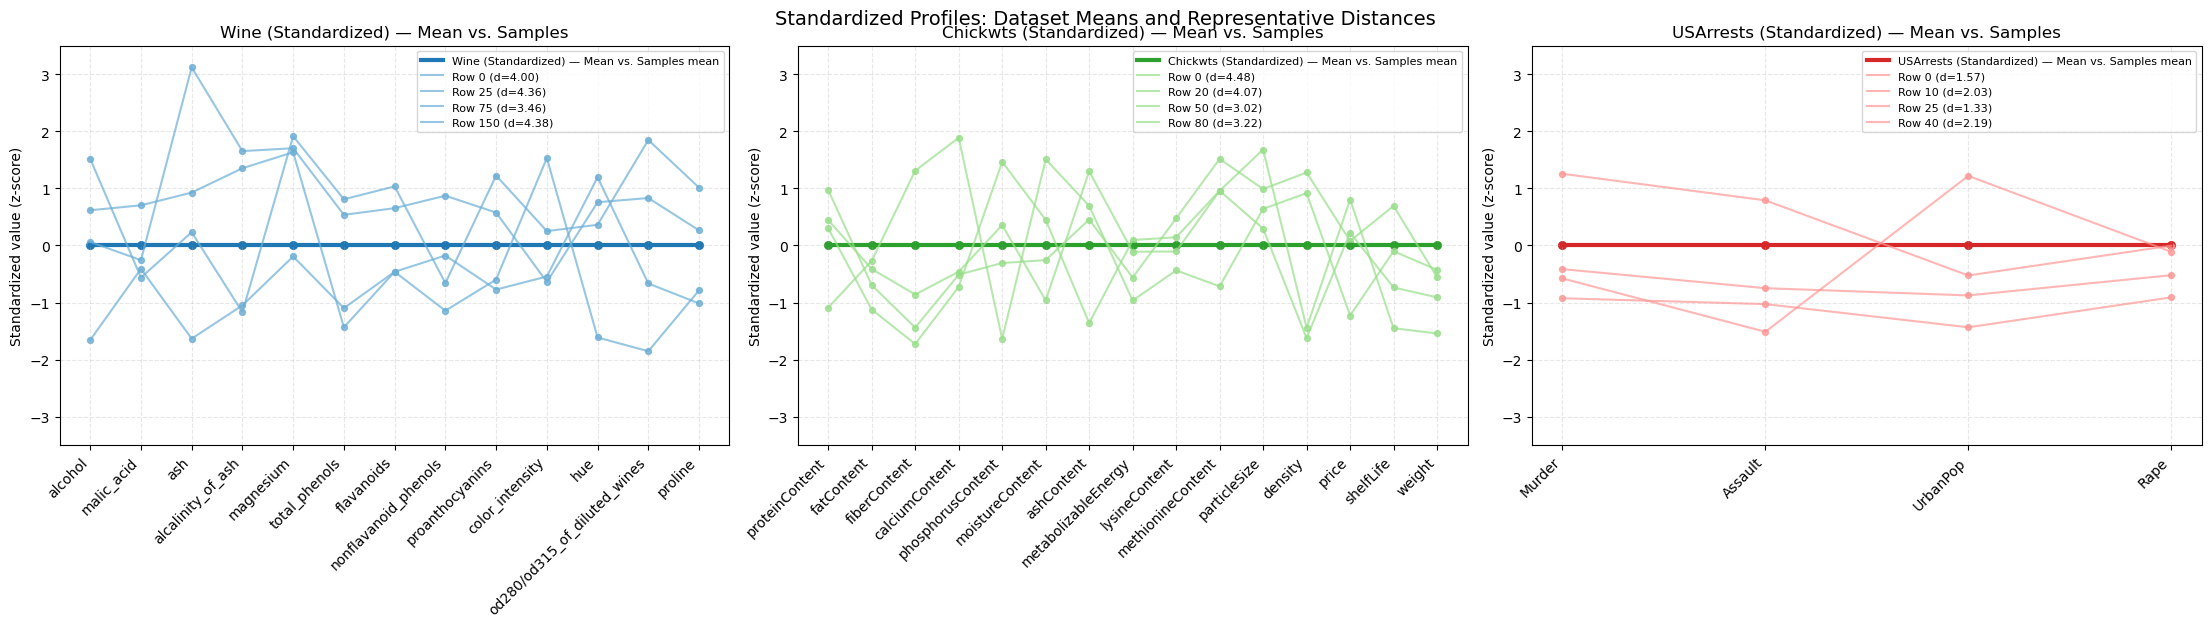

In [8]:
# Visualizing standardized profiles: mean vs. representative samples

import numpy as np
import matplotlib.pyplot as plt

def plot_standardized_profiles(ax, scaled_df, title, mean_color, sample_color, pick_indices):
    """
    ax            : matplotlib Axes
    scaled_df     : DataFrame of standardized numeric features
    title         : panel title
    mean_color    : color for mean line
    sample_color  : color for sample lines/points
    pick_indices  : list of row indices to highlight
    """
    # Mean profile across features
    mean_vec = scaled_df.mean(axis=0).values
    features = list(scaled_df.columns)

    # Plot mean line
    ax.plot(features, mean_vec, linewidth=3, label=f"{title} mean", color=mean_color)
    ax.scatter(features, mean_vec, s=30, color=mean_color)

    # Plot selected samples and compute distance to mean
    for idx in pick_indices:
        row = scaled_df.iloc[idx].values
        dist = np.linalg.norm(row - mean_vec)  # Euclidean distance in standardized space
        ax.plot(features, row, linewidth=1.5, alpha=0.7, label=f"Row {idx} (d={dist:.2f})", color=sample_color)
        ax.scatter(features, row, s=18, alpha=0.8, color=sample_color)

    # Cosmetics
    ax.set_title(title)
    ax.set_ylabel("Standardized value (z-score)")
    ax.set_xticklabels(features, rotation=45, ha='right')
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.set_ylim(-3.5, 3.5)
    ax.legend(loc="upper right", fontsize=8, frameon=True)

# Deterministic picks (adjust if you prefer others)
wine_picks = [0, 25, 75, 150]                    # within 0..177
chickwts_picks = [0, 20, 50, 80]                 # within 0..99
arrests_picks = [0, 10, 25, 40]                  # within 0..49

fig, axes = plt.subplots(1, 3, figsize=(22, 6), constrained_layout=True)

plot_standardized_profiles(
    axes[0],
    wine_scaled_df,
    title="Wine (Standardized) — Mean vs. Samples",
    mean_color="#1f77b4",   # bold for mean
    sample_color="#6baed6", # lighter for samples
    pick_indices=wine_picks
)

plot_standardized_profiles(
    axes[1],
    chickwts_scaled_df,
    title="Chickwts (Standardized) — Mean vs. Samples",
    mean_color="#2ca02c",
    sample_color="#98df8a",
    pick_indices=chickwts_picks
)

plot_standardized_profiles(
    axes[2],
    arrests_scaled_df,
    title="USArrests (Standardized) — Mean vs. Samples",
    mean_color="#d62728",
    sample_color="#ff9896",
    pick_indices=arrests_picks
)

plt.suptitle("Standardized Profiles: Dataset Means and Representative Distances", y=1.02, fontsize=14)
plt.show()


Each panel shows the average standardized profile (bold line) for that dataset.

The thin lines are representative samples; their labels include the distance to the mean in standardized space.

Bigger distance = more atypical overall across features (not just on one metric).

This sets up why PCA/k-NN/clustering will behave better after standardization: every metric pulls its fair weight instead of letting “big-range” features dominate.

Now that we have standardaized the data we can use PCA and hyperparameter tuning to optimize k-NN classification.  The code below converts categorical target labels into numeric values.  If target labels already are numerical...well that's great, we will make sure to keep it and just report classes. 

In [9]:
# Step 2: Ensure target labels are numeric (Wine dataset)

from sklearn.preprocessing import LabelEncoder

# Copy original target for safety/reference
wine_df['target_original'] = wine_df['target']

# If target is non-numeric (object or category), encode to 0..K-1
if wine_df['target'].dtype == 'O' or str(wine_df['target'].dtype).startswith('category'):
    le = LabelEncoder()
    wine_df['target'] = le.fit_transform(wine_df['target'])
    # Show mapping from original labels -> numeric codes
    label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("Encoded target labels (original -> code):", label_mapping)
else:
    # Already numeric — ensure integer type and report unique classes
    wine_df['target'] = wine_df['target'].astype(int)
    print("Target labels are already numeric. Unique classes:", sorted(wine_df['target'].unique()))

# Define features (X) and target (y) for downstream PCA + k-NN
X_wine = wine_df.drop(columns=['target', 'target_original'])  # raw features
y_wine = wine_df['target']

print("X_wine shape:", X_wine.shape, "| y_wine shape:", y_wine.shape)


Target labels are already numeric. Unique classes: [0, 1, 2]
X_wine shape: (178, 13) | y_wine shape: (178,)


Here is what that output is telling us:

Verified and prepared the label (y): and made sure that the wine "target" was already numeric.
It is numeric (classes [0, 1, 2]), so no encoding was needed.


Split features vs. target:
X_wine = all 13 numeric predictors, everything except target and target original.
y_wine = the numeric class codes in target.


Confirmed shapes:
X_wine.shape == (178, 13): 178 wine samples × 13 chemical features.
y_wine.shape == (178,): one class label per sample.

Most classifiers (including k-NN) expect the target to be numeric—we validated that.
PCA and k-NN will operate on X only; keeping y separate avoids leakage.


Next we will apply PCA to reduce dimensionality while retaining 95% variance.

In [10]:
#PCA -retain 95% variance on Wine features.


pca_wine = PCA(n_components=0.95, svd_solver='full')
X_wine_pca = pca_wine.fit_transform(wine_scaled_df)

# Reporting
total_var = pca_wine.explained_variance_ratio_.sum()
print(f"PCA selected components: {pca_wine.n_components_} out of {wine_scaled_df.shape[1]} features")
print(f"Total variance retained: {total_var:.2%}")
print("Original (scaled) shape:", wine_scaled_df.shape, " | PCA shape:", X_wine_pca.shape)


PCA selected components: 10 out of 13 features
Total variance retained: 96.17%
Original (scaled) shape: (178, 13)  | PCA shape: (178, 10)


Here is essentially what we just did:
We compressed 13 measurements into 10 synthesized features while keeping 96.17% of the useful signal in the data.

Before: 178 wines × 13 features / After (PCA): 178 wines × 10 components

We still kept 96.17% of the total variation, so only ~3.83% was trimmed—mostly noise and/r redundancy.

We didn’t delete rows or lose labels; we re-expressed the columns more efficiently.

Next, we’ll plug this into a Pipeline and run GridSearchCV to tune k-NN using the PCA-transformed features.

In [11]:
#Grid search 

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# Pipeline: scale -> PCA (95% variance) -> k-NN
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95, svd_solver="full")),
    ("classifier", KNeighborsClassifier())
])

# Parameter grid:
# - Case 1: Minkowski with p in {1 (Manhattan), 2 (Euclidean)}
# - Case 2: Explicit metrics that don't use p
param_grid = [
    {
        "classifier__metric": ["minkowski"],
        "classifier__p": [1, 2],
        "classifier__n_neighbors": list(range(1, 31))
    },
    {
        "classifier__metric": ["euclidean", "manhattan", "chebyshev"],
        "classifier__n_neighbors": list(range(1, 31))
    }
]


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search 
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    return_train_score=True
)

# Run search
grid.fit(X_wine, y_wine)

# Results
print("Best params:", grid.best_params_)
print(f"Best CV accuracy: {grid.best_score_:.4f}")

# How many PCA components were chosen inside the best pipeline?
best_pipe = grid.best_estimator_
print("PCA components selected (inside CV):", best_pipe.named_steps["pca"].n_components_)

# Show top 10 configurations
cvres = pd.DataFrame(grid.cv_results_)
cols_to_show = [
    "rank_test_score", "mean_test_score", "std_test_score",
    "param_classifier__n_neighbors", "param_classifier__metric", "param_classifier__p"
]
display(cvres.sort_values("rank_test_score").head(10)[cols_to_show])


Best params: {'classifier__metric': 'minkowski', 'classifier__n_neighbors': 17, 'classifier__p': 2}
Best CV accuracy: 0.9832
PCA components selected (inside CV): 10


,rank_test_score,mean_test_score,std_test_score,param_classifier__n_neighbors,param_classifier__metric,param_classifier__p
76,1,0.983175,0.013741,17,euclidean,NaN
33,1,0.983175,0.013741,17,minkowski,2.0
79,3,0.977619,0.020832,20,euclidean,NaN
80,3,0.977619,0.020832,21,euclidean,NaN
78,3,0.977619,0.011195,19,euclidean,NaN
77,3,0.977619,0.020832,18,euclidean,NaN
31,3,0.977619,0.020832,16,minkowski,2.0
89,3,0.977619,0.020832,30,euclidean,NaN
75,3,0.977619,0.020832,16,euclidean,NaN
35,3,0.977619,0.020832,18,minkowski,2.0


We compressed the inputs to 10 smart summary features, then classified each wine by the 17 most similar past wines via Euclidean distance. This setup scored ~98% accuracy in cross-validation, which is both strong and reliable.

Nest step is to train the k-NN classifier using the best parameters.

Hold-out Test Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



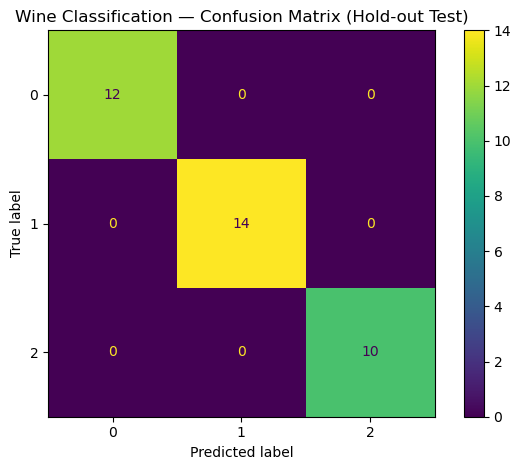

In [12]:
#Train k-NN with best parameters

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Pull best params from the grid search 
try:
    best_params = grid.best_params_
except NameError:
    best_params = {'classifier__metric': 'minkowski', 'classifier__n_neighbors': 17, 'classifier__p': 2}

k = int(best_params['classifier__n_neighbors'])
metric = best_params['classifier__metric']
p = best_params.get('classifier__p', None)

# Train/test split with stratification to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X_wine, y_wine, test_size=0.20, stratify=y_wine, random_state=42
)


best_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95, svd_solver="full")),
    ("classifier", KNeighborsClassifier(
        n_neighbors=k,
        metric=metric,
        **({"p": p} if metric == "minkowski" and p is not None else {})
    ))
])

# Train on the training set
best_pipeline.fit(X_train, y_train)

# Evaluate on the hold-out test set
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Hold-out Test Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Wine Classification — Confusion Matrix (Hold-out Test)")
plt.tight_layout()
plt.show()


What the confusion matrix shows:
Perfect diagonal (12, 14, 10) and all zeros elsewhere → every wine in the test set was classified correctly.

Our cross-validated search earlier averaged 98.32%, so this perfect test result isn’t a fluke spike from a sloppy process.
On unseen data, the model got every single wine right. That aligns with ~98% cross-validated accuracy—strong, stable performance.

Now we are ready to move on to use PCA and cosine similarity to suggest similar feeds for the chickwts_data. 

In [ ]:


from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


chickwts_df['feed_name'] = chickwts_df['feed_name'].astype(str).str.strip()


chickwts_scaled_with_feed = pd.concat(
    [chickwts_df[['feed_name']].reset_index(drop=True),
     chickwts_scaled_df.reset_index(drop=True)],
    axis=1
)

# Aggregate
feed_profiles = chickwts_scaled_with_feed.groupby('feed_name', as_index=True).mean()
feed_profiles.index.name = 'feed'  

# PCA 
pca_feed = PCA(n_components=1, svd_solver='full')
feed_pc1 = pca_feed.fit_transform(feed_profiles.values)
feed_pc1_df = pd.DataFrame(feed_pc1, index=feed_profiles.index, columns=['PC1'])

# Cosine similarities
sim_full = cosine_similarity(feed_profiles.values)
sim_full_df = pd.DataFrame(sim_full, index=feed_profiles.index, columns=feed_profiles.index)
sim_full_df.index.name = sim_full_df.columns.name = 'feed'

sim_pc1 = cosine_similarity(feed_pc1)
sim_pc1_df = pd.DataFrame(sim_pc1, index=feed_profiles.index, columns=feed_profiles.index)
sim_pc1_df.index.name = sim_pc1_df.columns.name = 'feed'


def recommend_similar_feeds(target_feed, top_n=5, use='full'):
    """
    Return top-N most similar feeds to `target_feed`.
    use='full' -> cosine similarity on full standardized profile (default)
    use='pc1'  -> cosine similarity on 1D PC1 embedding
    """
    if target_feed not in feed_profiles.index:
        raise ValueError(f"'{target_feed}' not found. Available feeds: {list(feed_profiles.index)}")

    sim_df = sim_full_df if use == 'full' else sim_pc1_df
    sims = sim_df.loc[target_feed].drop(index=target_feed).sort_values(ascending=False)

    # Convert to DataFrame 
    out = sims.head(top_n).to_frame(name='similarity').reset_index()
    out.rename(columns={out.columns[0]: 'feed'}, inplace=True)  

    # Enrich with PC1 context
    out = out.merge(feed_pc1_df, left_on='feed', right_index=True, how='left')
    out = out.rename(columns={'PC1': 'feed_PC1'})
    out['target_PC1'] = float(feed_pc1_df.loc[target_feed, 'PC1'])
    out['|PC1_diff|'] = (out['feed_PC1'] - out['target_PC1']).abs()
    return out


# Example run
example_feed = chickwts_df['feed_name'].iloc[0]  # e.g., 'FirstPeck'
print(f"Top similar feeds to '{example_feed}' (cosine on FULL profile):")
display(recommend_similar_feeds(example_feed, top_n=5, use='full'))

print(f"\nTop similar feeds to '{example_feed}' (cosine on PC1 only):")
display(recommend_similar_feeds(example_feed, top_n=5, use='pc1'))



Top similar feeds to 'FirstPeck' (cosine on FULL profile):


,feed,similarity,feed_PC1,target_PC1,|PC1_diff|
0,FeatherUp Complete,0.798042,1.845311,2.165341,0.320029
1,BroilerPlus Advanced,0.694328,0.975007,2.165341,1.190334
2,WeightGain Pro,0.658738,-0.020526,2.165341,2.185866
3,ShellMax Enhanced,0.587673,4.342044,2.165341,2.176703
4,StartRight Formula,0.582451,2.378046,2.165341,0.212705



Top similar feeds to 'FirstPeck' (cosine on PC1 only):


,feed,similarity,feed_PC1,target_PC1,|PC1_diff|
0,HatchMate Premier,1.0,0.247816,2.165341,1.917525
1,ReadyWeight Complete,1.0,2.431806,2.165341,0.266466
2,RapidGrow Complete,1.0,4.206129,2.165341,2.040788
3,FeatherUp Complete,1.0,1.845311,2.165341,0.320029
4,FertileEgg Premium,1.0,3.489606,2.165341,1.324265


We standardized all numeric attributes (including weight) and built an average profile per feed.
PC1 is a single “summary axis” of performance/characteristics for each feed.

Cosine similarity compares feeds by overall profile shape (direction), which is ideal for “feeds that behave similarly” rather than “feeds with identical absolute levels.”

The function gives a ranked list of similar feeds; adding use='pc1' shows a simpler, one-axis variant

Next we can move on to step 4: Identify clusters in crime data using feature selection and dimensionality reduction.

In [21]:
# Step 4.1 — Select top 3 relevant features for clustering (USArrests)
# Method: PCA-weighted absolute loadings (unsupervised relevance)

features_all = arrests_scaled_df.columns.tolist()

# PCA on all standardized features
pca_fs = PCA(n_components=None, svd_solver='full')
pca_fs.fit(arrests_scaled_df)

# Loadings: rows=features, cols=PCs
loadings = pd.DataFrame(
    pca_fs.components_.T,
    index=features_all,
    columns=[f"PC{i+1}" for i in range(pca_fs.n_components_)]
)

# Importance per feature: sum_j |loading(f, PC_j)| * var_ratio_j
var_ratio = pca_fs.explained_variance_ratio_
importance = (loadings.abs() * var_ratio).sum(axis=1).sort_values(ascending=False)

print("PCA-weighted feature importance (higher = more structurally informative):")
display(importance.to_frame("importance"))

# Select top 3
top3_features = importance.head(3).index.tolist()
print("\nSelected top 3 features for clustering:", top3_features)

# Keep only those for downstream PCA -> clustering
arrests_top3_df = arrests_scaled_df[top3_features].copy()
print("Subset shape (states x selected features):", arrests_top3_df.shape)


PCA-weighted feature importance (higher = more structurally informative):


,importance
Murder,0.494332
Assault,0.464260
Rape,0.455120
UrbanPop,0.427965



Selected top 3 features for clustering: ['Murder', 'Assault', 'Rape']
Subset shape (states x selected features): (50, 3)


We picked the three crime variables that contribute most to the overall structure of the data, based on PCA loadings—an objective, unsupervised ranking method.

Step 4.2 — PCA to 2 components (on the selected 3 features)

In [22]:
# PCA → 2 components on the selected top-3 features
states = arrests_df['Unnamed: 0'].values  # keep state names for plotting/labels

pca_arrests = PCA(n_components=2, svd_solver='full')
X_arrests_pca2 = pca_arrests.fit_transform(arrests_top3_df)

arrests_pca2_df = pd.DataFrame(X_arrests_pca2, columns=['PC1', 'PC2'])
arrests_pca2_df['state'] = states

print("Explained variance (PC1, PC2):",
      f"{pca_arrests.explained_variance_ratio_[0]:.2%}, {pca_arrests.explained_variance_ratio_[1]:.2%}",
      "| Total:", f"{pca_arrests.explained_variance_ratio_.sum():.2%}")
display(arrests_pca2_df.head())


Explained variance (PC1, PC2): 78.62%, 15.27% | Total: 93.89%


,PC1,PC2,state
0,1.210191,-0.842277,Alabama
1,2.332187,1.539434,Alaska
2,1.518593,0.503363,Arizona
3,0.177776,-0.328029,Arkansas
4,2.066000,1.285497,California


Step 4.3 — Determine optimal clusters

Elbow for K-Means and BIC for GMM

c:\Users\jewbo\anaconda3\envs\reco310\lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
c:\Users\jewbo\anaconda3\envs\reco310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jewbo\anaconda3\envs\reco310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with M

Suggested K-Means k (elbow): 2


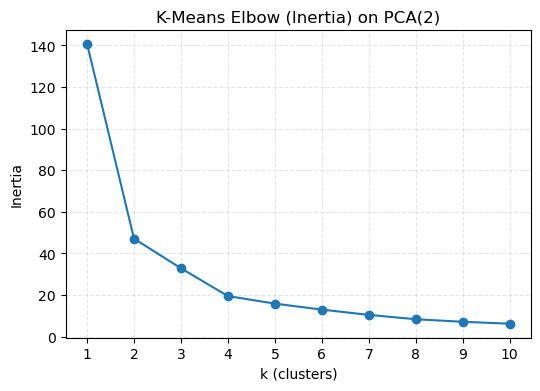

c:\Users\jewbo\anaconda3\envs\reco310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jewbo\anaconda3\envs\reco310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jewbo\anaconda3\envs\reco310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jewbo\anaconda3\envs\reco310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarn

Best GMM by BIC: n_components=2, covariance='diag', BIC=287.8


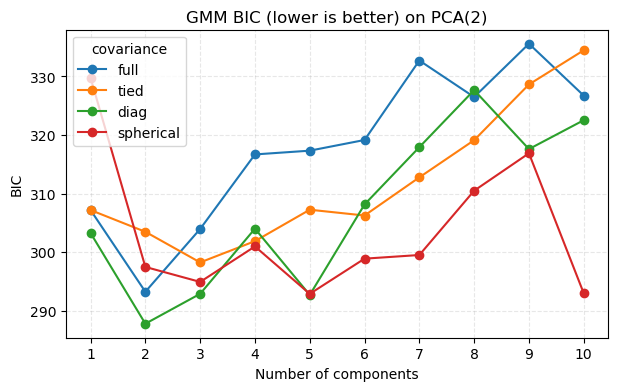

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def knee_from_elbow(x_vals, y_vals):
    x = np.array(x_vals, dtype=float)
    y = np.array(y_vals, dtype=float)
    
    x = (x - x.min()) / (x.max() - x.min())
    y = (y - y.min()) / (y.max() - y.min())
    p1 = np.array([x[0], y[0]])
    p2 = np.array([x[-1], y[-1]])
    
    distances = np.abs(np.cross(p2 - p1, np.vstack([x, y]).T - p1)) / np.linalg.norm(p2 - p1)
    
    best_idx = max(1, int(np.argmax(distances)))
    return best_idx  

#K-Means elbow 
k_range = list(range(1, 11))
inertias = []
for k in k_range:
    km = KMeans(n_clusters=k, n_init=50, random_state=42)
    km.fit(X_arrests_pca2)
    inertias.append(km.inertia_)


knee_idx = knee_from_elbow(k_range, inertias)
k_best_kmeans = k_range[knee_idx]
print(f"Suggested K-Means k (elbow): {k_best_kmeans}")

plt.figure(figsize=(6,4))
plt.plot(k_range, inertias, marker='o')
plt.title("K-Means Elbow (Inertia) on PCA(2)")
plt.xlabel("k (clusters)")
plt.ylabel("Inertia")
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

#GMM BIC 
cov_types = ['full', 'tied', 'diag', 'spherical']
n_range = list(range(1, 11))
bic_mat = np.zeros((len(cov_types), len(n_range)))

best_bic = np.inf
best_cov = None
best_n = None

for i, cov in enumerate(cov_types):
    for j, n in enumerate(n_range):
        g = GaussianMixture(n_components=n, covariance_type=cov, random_state=42, n_init=10)
        g.fit(X_arrests_pca2)
        bic = g.bic(X_arrests_pca2)
        bic_mat[i, j] = bic
        if bic < best_bic:
            best_bic, best_cov, best_n = bic, cov, n

print(f"Best GMM by BIC: n_components={best_n}, covariance='{best_cov}', BIC={best_bic:.1f}")

plt.figure(figsize=(7,4))
for i, cov in enumerate(cov_types):
    plt.plot(n_range, bic_mat[i], marker='o', label=cov)
plt.legend(title="covariance")
plt.title("GMM BIC (lower is better) on PCA(2)")
plt.xlabel("Number of components")
plt.ylabel("BIC")
plt.xticks(n_range)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Step 4.4 — Fit models and visualize side-by-side


c:\Users\jewbo\anaconda3\envs\reco310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jewbo\anaconda3\envs\reco310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jewbo\anaconda3\envs\reco310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jewbo\anaconda3\envs\reco310\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarn

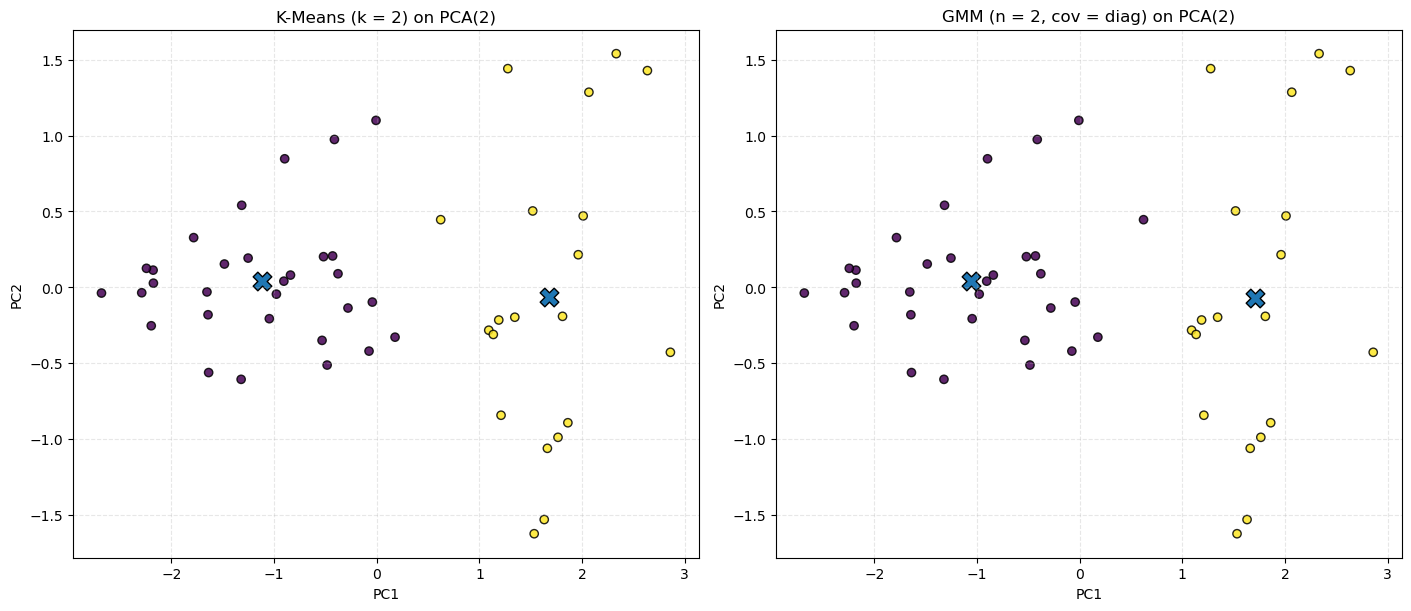

Lowest-confidence (borderline) states by GMM:


,state,PC1,PC2,gmm_conf,gmm_cluster
24,Missouri,0.622461,0.445829,0.688248,0
12,Illinois,1.090540,-0.282248,0.869421,1
42,Texas,1.134838,-0.310224,0.898422,1
41,Tennessee,1.188036,-0.214913,0.908166,1
36,Oregon,-0.007561,1.099892,0.950286,0


In [ ]:
# Fit final models with hyperparameters
kmeans_final = KMeans(n_clusters=k_best_kmeans, n_init=100, random_state=42)
kmeans_labels = kmeans_final.fit_predict(X_arrests_pca2)
kmeans_centers = kmeans_final.cluster_centers_

gmm_final = GaussianMixture(n_components=best_n, covariance_type=best_cov, random_state=42, n_init=20)
gmm_labels = gmm_final.fit_predict(X_arrests_pca2)
gmm_means = gmm_final.means_
gmm_conf = gmm_final.predict_proba(X_arrests_pca2).max(axis=1)  # per-point confidence


arrests_pca2_df['kmeans_cluster'] = kmeans_labels
arrests_pca2_df['gmm_cluster'] = gmm_labels
arrests_pca2_df['gmm_conf'] = gmm_conf

# Side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# K-Means 
ax = axes[0]
sc0 = ax.scatter(arrests_pca2_df['PC1'], arrests_pca2_df['PC2'],
                 c=arrests_pca2_df['kmeans_cluster'], cmap='viridis', edgecolor='k', alpha=0.85)
ax.scatter(kmeans_centers[:,0], kmeans_centers[:,1], s=180, marker='X', edgecolor='k')
ax.set_title(f"K-Means (k = {k_best_kmeans}) on PCA(2)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.grid(True, linestyle='--', alpha=0.3)

# GMM 
ax = axes[1]
sc1 = ax.scatter(arrests_pca2_df['PC1'], arrests_pca2_df['PC2'],
                 c=arrests_pca2_df['gmm_cluster'], cmap='viridis', edgecolor='k', alpha=0.85)
ax.scatter(gmm_means[:,0], gmm_means[:,1], s=180, marker='X', edgecolor='k')
ax.set_title(f"GMM (n = {best_n}, cov = {best_cov}) on PCA(2)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.grid(True, linestyle='--', alpha=0.3)

plt.show()

# highlight lowest-confidence GMM points 
low_conf = arrests_pca2_df.nsmallest(5, 'gmm_conf')[['state', 'PC1', 'PC2', 'gmm_conf', 'gmm_cluster']]
print("Lowest-confidence (borderline) states by GMM:")
display(low_conf)




We reduced the crime metrics (Murder/Assault/Rape) to a 2D map that preserves most of the structure.

Using that 2D map:

K-Means (elbow) suggested k = X clusters = hard group membership per state.

GMM (BIC) suggested n = Y components with covariance = probabilistic membership and confidence per state.

The side-by-side plot shows consistent regional patterns across methods; GMM additionally flags borderline states.

Overall Summary of the Lab:

Project 1 — Wine Classification (k-NN + PCA)

Goal: Classify wine varieties from lab measurements.

Method: Standardize = PCA ≥95% variance, 10 comps;  k-NN Grid Search.

Best model: k=17, Euclidean distance.

CV Accuracy: apprx. 98.32%.

Hold-out Test: 100% all classes: precision/recall/F1 = 1.00.

Why it works: Distance methods benefit from standardization + PCA removing redundancy.

Next steps: Deploy pipeline .joblib, monitor on fresh batches.



Project 2 — Feed Recommendation PCA + Cosine Similarity

Goal: Suggest similar chicken feeds based on performance profile.

Method: Standardize all numeric features, average per feed = PCA(1) summary axis → cosine similarity on full standardized profiles.

Deliverables: recommend similar feeds, similarity matrix CSV, PC1 ranking.

Why it works: Cosine captures “shape” similarity across attributes, not just magnitude.



Project 3 — Crime Clustering (K-Means & GMM on PCA)

Goal: Identify natural groupings of states by crime.

Feature selection: PCA-weighted importance = Murder, Assault, Rape.

Dimensionality reduction: PCA = 2 components for a stable 2D map.

Cluster selection: Elbow for K-Means; BIC for GMM.

Results: Side-by-side plots show hard clusters (K-Means) vs probabilistic clusters (GMM) with confidence; list borderline states low GMM confidence for policy nuance.

Why two methods: K-Means is crisp & simple; GMM adds uncertainty modeling.